# import the libraries and read thee data

In [375]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [376]:
!gdown --id 1r6lBtr_2bnKugeZ-RvMcYzw4Q84dT0WH

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1r6lBtr_2bnKugeZ-RvMcYzw4Q84dT0WH
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 64.2MB/s]


In [377]:
data = pd.read_csv("/content/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [379]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [380]:
data.describe(exclude="number")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [381]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

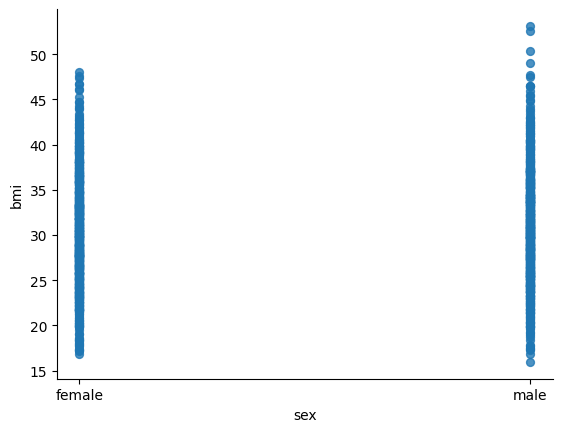

In [382]:
data.plot(kind='scatter', x='sex', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

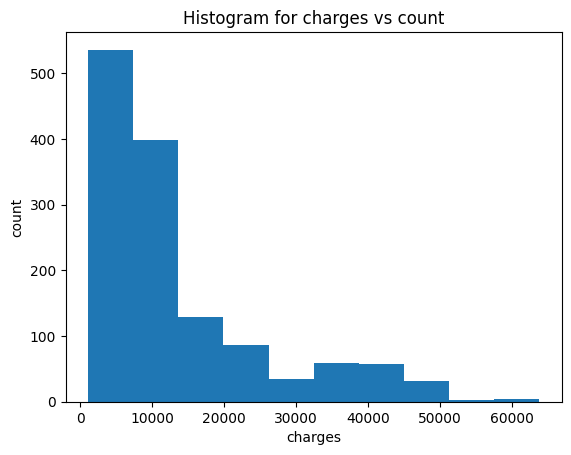

In [383]:
plt.title('Histogram for charges vs count')
plt.xlabel('charges')
plt.ylabel('count')
plt.hist(data['charges']);

<ipython-input-384-a14f3fd92cdc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'], bins=20);


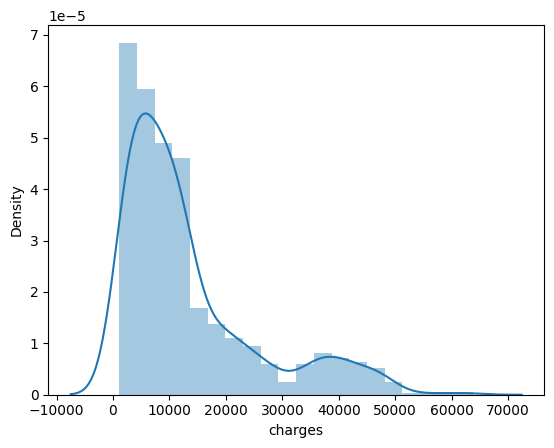

In [384]:
sns.distplot(data['charges'], bins=20);

In [385]:
data['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [386]:
region_v_charges = data.groupby('region')['charges'].mean() / data['charges'].mean()
region_v_charges

region
northeast    1.010246
northwest    0.935733
southeast    1.110395
southwest    0.930410
Name: charges, dtype: float64

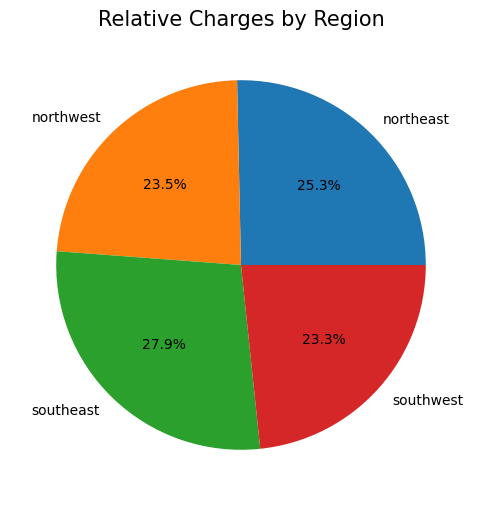

In [387]:
plt.figure(figsize=(10, 6))
labels = np.array(region_v_charges.index)
sizes = np.array(region_v_charges * 100)

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Relative Charges by Region", fontsize=15)
plt.show()


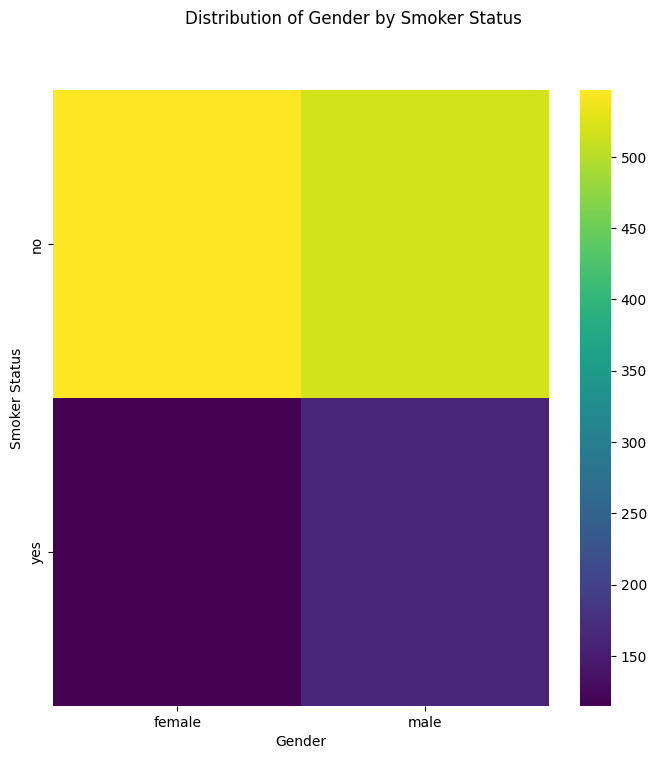

In [388]:
fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Distribution of Gender by Smoker Status')
# plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['smoker'].value_counts()
    for x_label, grp in data.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.suptitle('Distribution of Gender by Smoker Status')

plt.xlabel('Gender')
_ = plt.ylabel('Smoker Status')
plt.show()

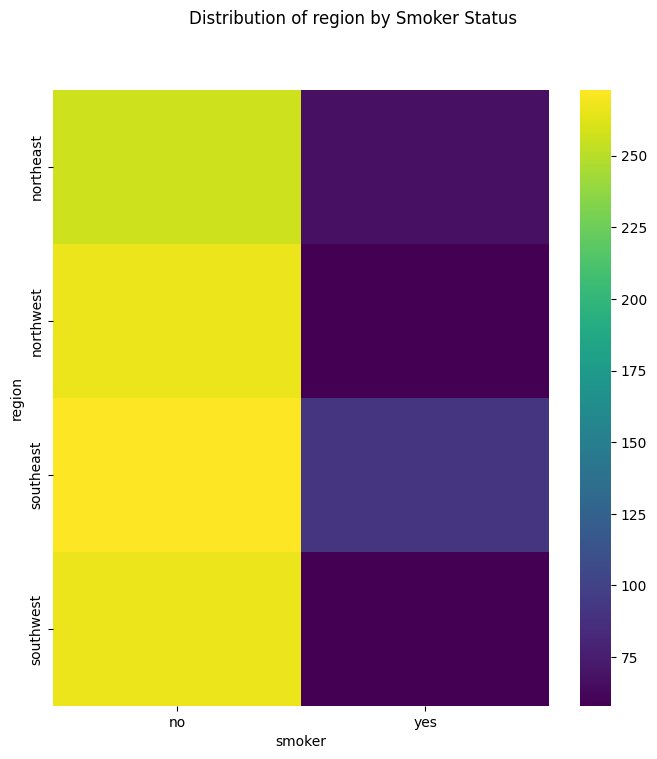

In [389]:
fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Distribution of region by Smoker Status')
df_2dhist = pd.DataFrame({
    x_label: grp['region'].value_counts()
    for x_label, grp in data.groupby('smoker')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('smoker')
_ = plt.ylabel('region')

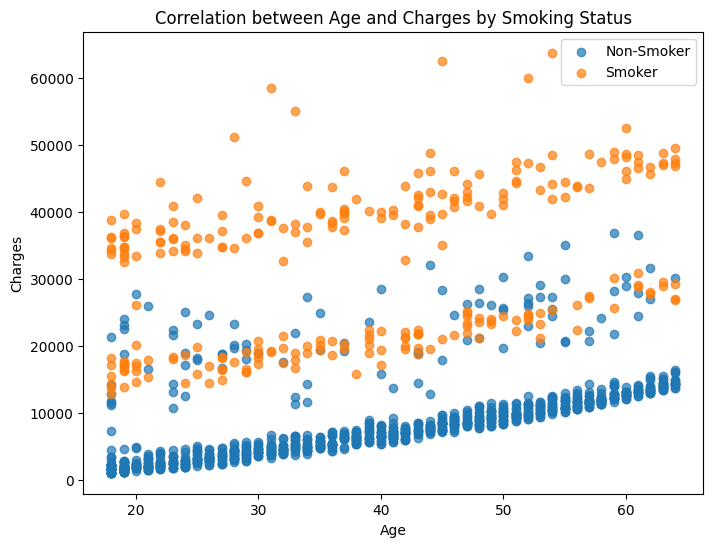

In [390]:
age = data['age']
charges = data['charges']
smoker = data['smoker']

plt.figure(figsize=(8, 6))
plt.scatter(age[smoker == 'no'], charges[smoker == 'no'], label='Non-Smoker', alpha=0.7)
plt.scatter(age[smoker == 'yes'], charges[smoker == 'yes'], label='Smoker', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Correlation between Age and Charges by Smoking Status')
_ = plt.legend()

# Future Engineering

In [391]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [392]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [393]:
data["sex"] = data["sex"].apply(lambda x: 1 if x == "male" else 0)
data["sex"]

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [394]:
data["smoker"] = data["smoker"].apply(lambda x: 1 if x == "yes" else 0)
data["smoker"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [395]:
regions = {"southeast": 1, "southwest": 2, "northeast": 3, "northwest": 4}
data["region"] = data["region"].apply(lambda x: regions[x])
data["region"]

0       2
1       1
2       1
3       4
4       4
       ..
1333    4
1334    3
1335    1
1336    2
1337    4
Name: region, Length: 1338, dtype: int64

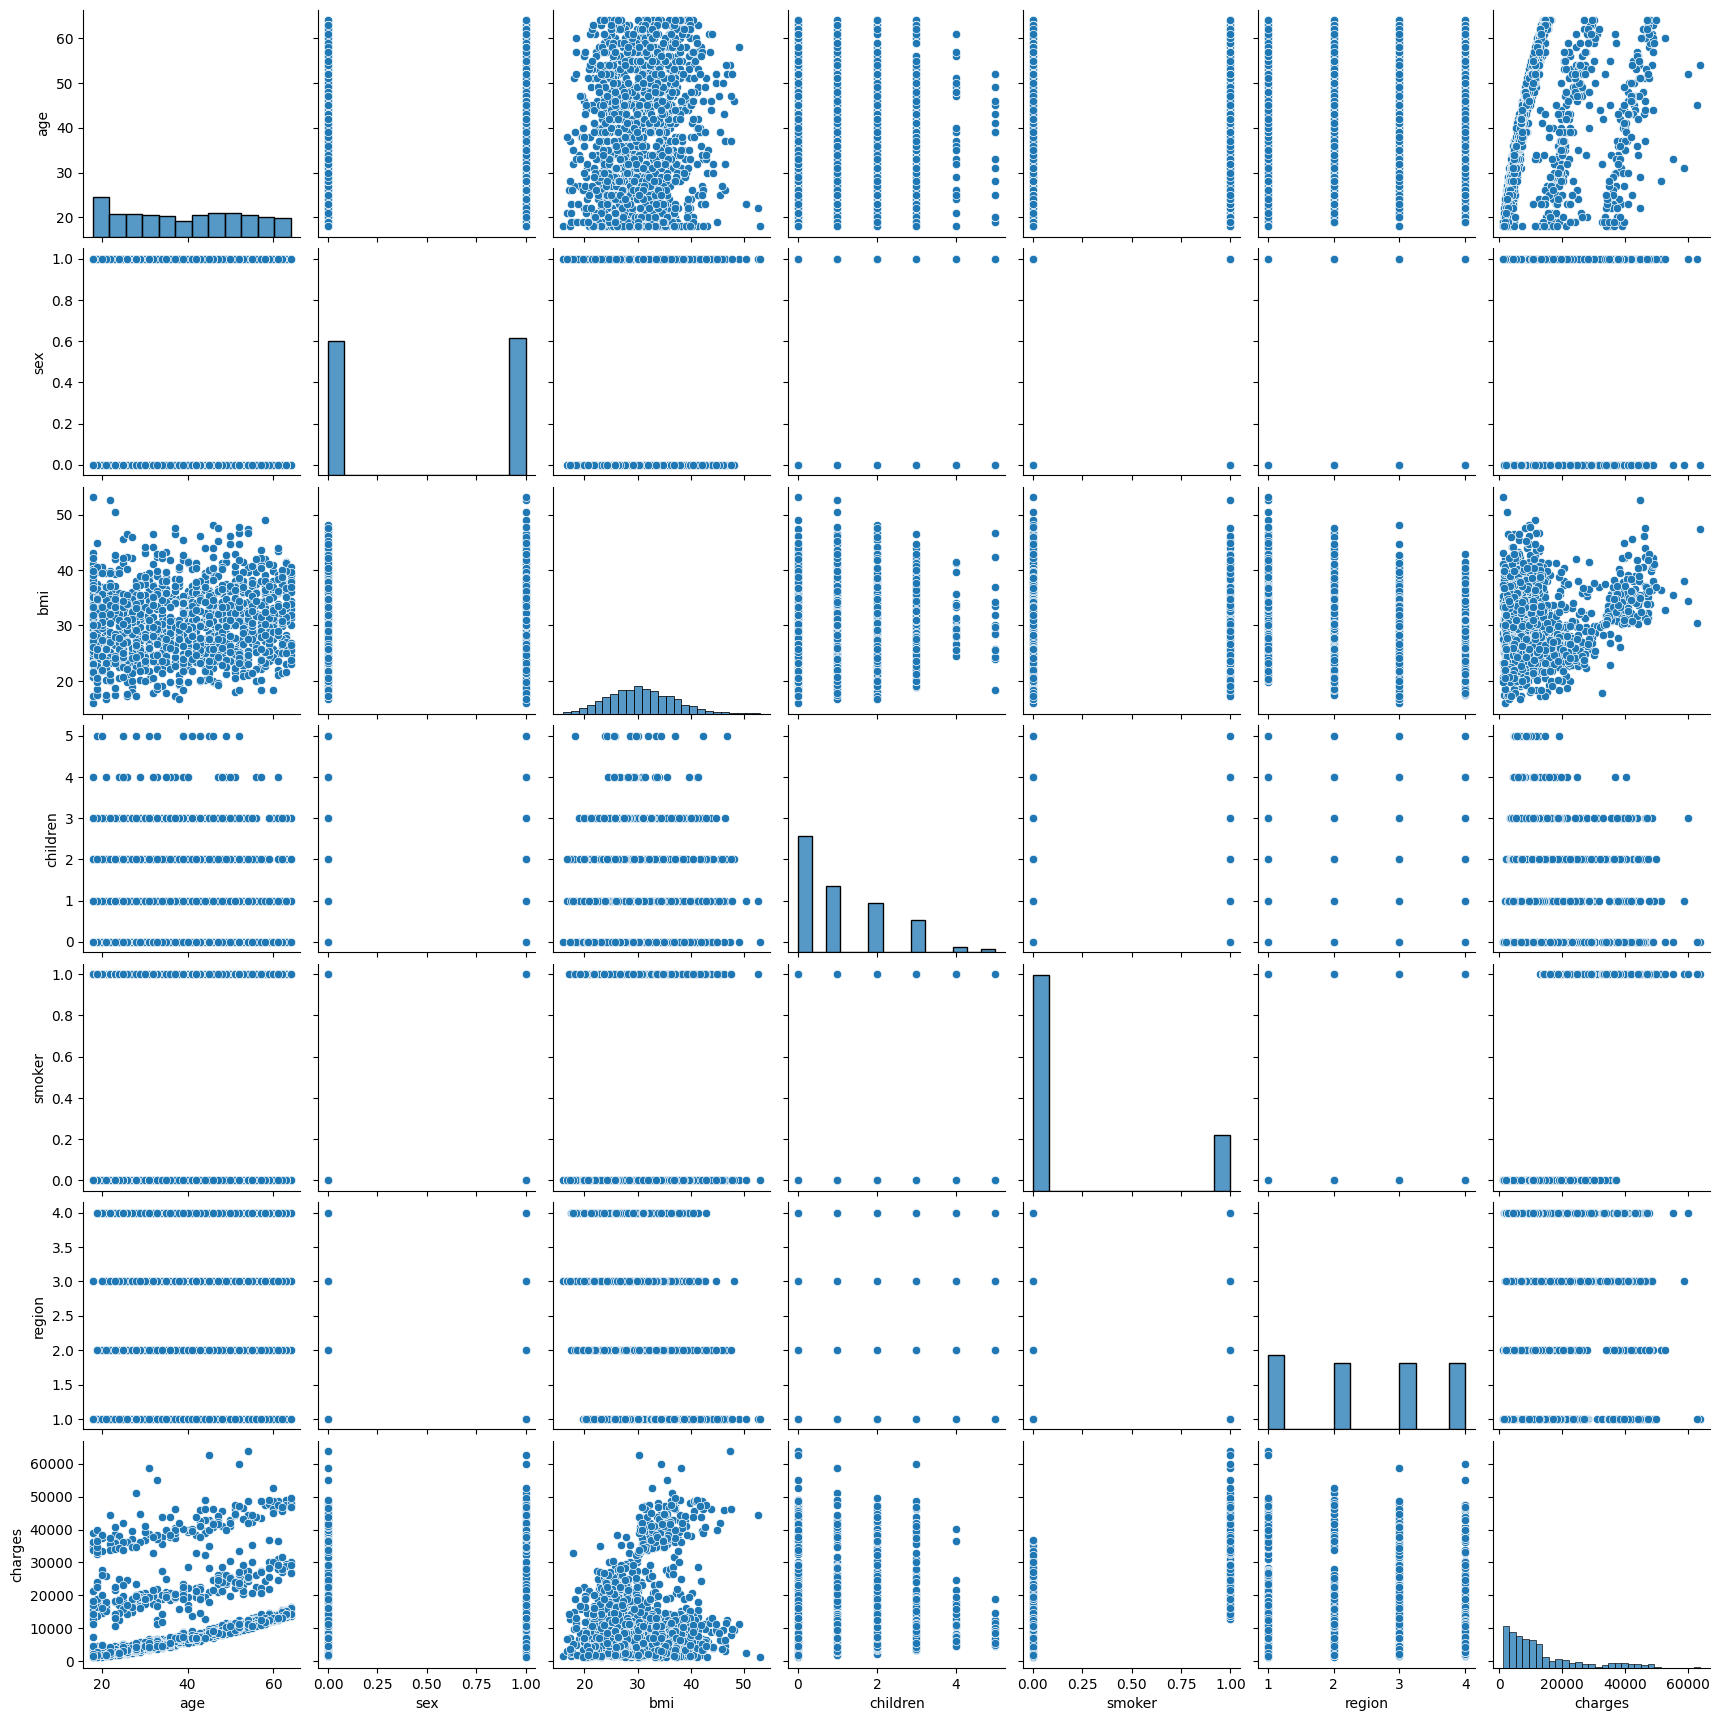

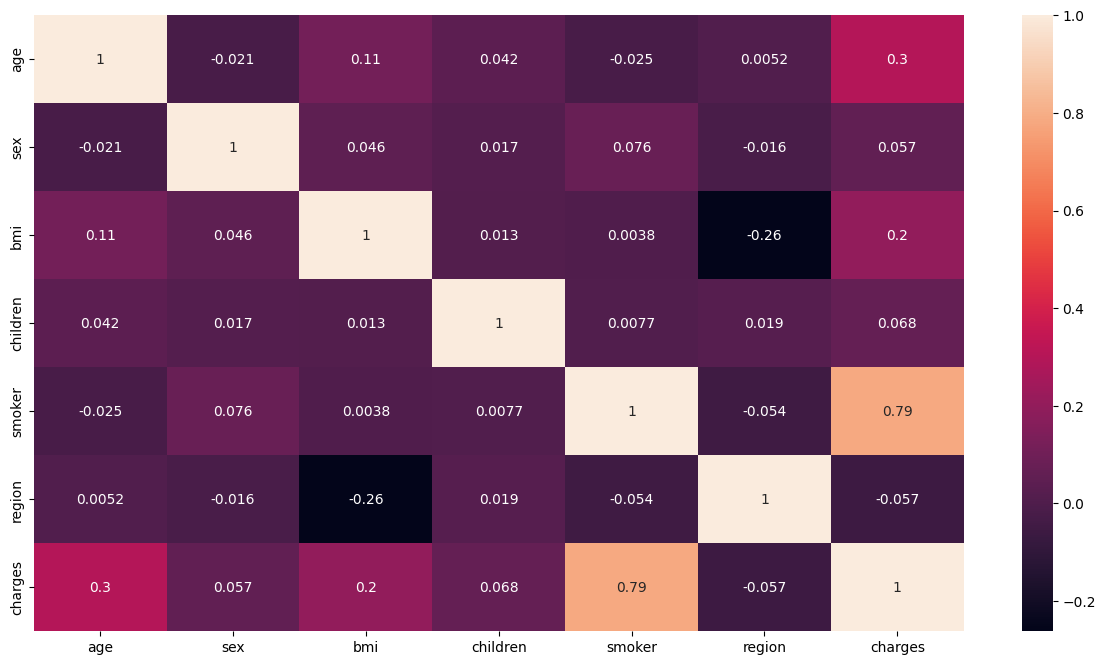

In [396]:
sns.pairplot(data);
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True);

In [397]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520


# ML (Linear Rigression)

In [398]:
data_x = data.drop(["charges"] , axis=1)
data_y = data["charges"]

In [399]:
print(f'{data_x.shape=}')
print(f'{data_y.shape=}')

data_x.shape=(1338, 6)
data_y.shape=(1338,)


In [400]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=23)

In [401]:
A = data_x.to_numpy()
A_train = X_train.to_numpy()
A_test = X_test.to_numpy()

target = data_y
train_target = y_train.to_numpy()
test_target = y_test

In [402]:
theta = np.linalg.solve(A_train.T @ A_train, A_train.T @ np.asarray(train_target).reshape(-1,1))
theta_yhat = np.linalg.solve(A.T @ A, A.T @ np.asarray(target).reshape(-1,1))

In [403]:
yhat_train = np.dot(A_train , theta )
yhat_test= np.dot(A_test , theta)
yhat = np.dot(A , theta_yhat)

In [404]:
def mean_squared_error(y_true, y_pred):
    ### the role of squared errors
    squared_errors = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]

    #### the  mean of squared errors
    mse = sum(squared_errors) / len(y_true)

    return mse


In [405]:
MSE_train = mean_squared_error(yhat_train, train_target)
MSE_test = mean_squared_error(yhat_test, test_target)
MSE = mean_squared_error(yhat , target)
print('Train MSE: {}'.format(MSE_train))
print('Test MSE: {}'.format(MSE_test))
print('the MSE: {}'.format(MSE))

Train MSE: [41361699.8240516]
Test MSE: [38465038.18378387]
the MSE: [40402708.77541494]


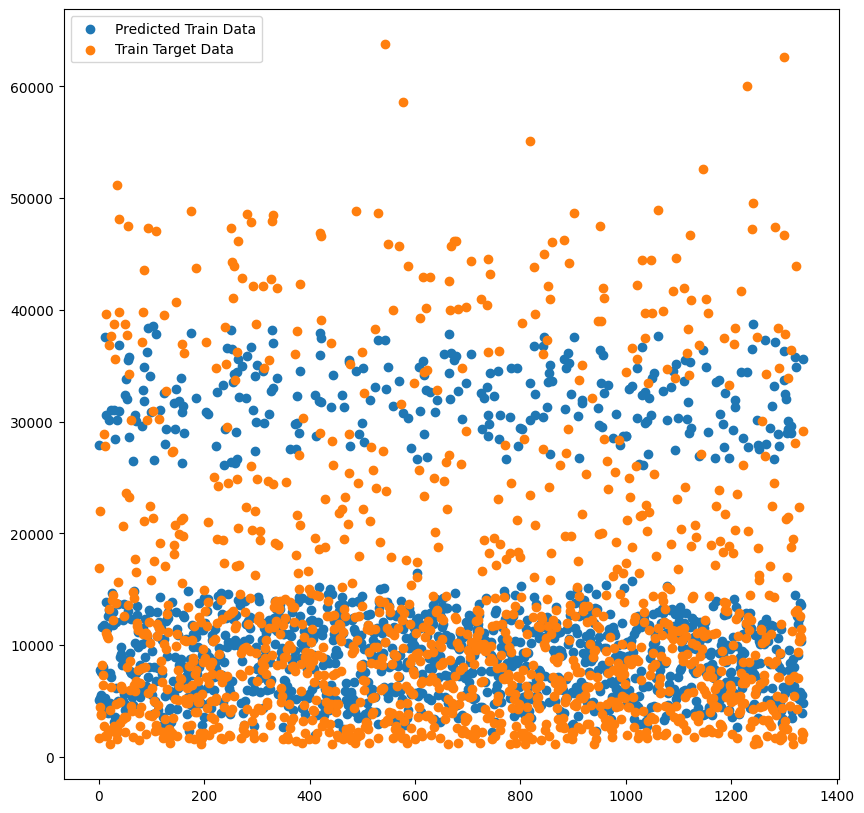

In [406]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(range(len(yhat)), yhat, label='Predicted Train Data')
plt.scatter(range(len(data_y)), data_y, label='Train Target Data')
plt.legend()
plt.show()


# by sklearn

In [407]:
from sklearn.linear_model import LinearRegression


In [408]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [409]:
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,data_x.columns,columns=['Coefficient'])
coeff_df

-13430.218307083733


,Coefficient
age,245.552755
sex,-180.546495
bmi,350.919928
children,530.757193
smoker,24310.963741
region,337.271991


In [410]:
predictions = lr.predict(X_test)
# predictions

In [411]:
Real_Values = np.array(y_test)
# Real_Values

<ipython-input-412-9863b151a0f0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=20);


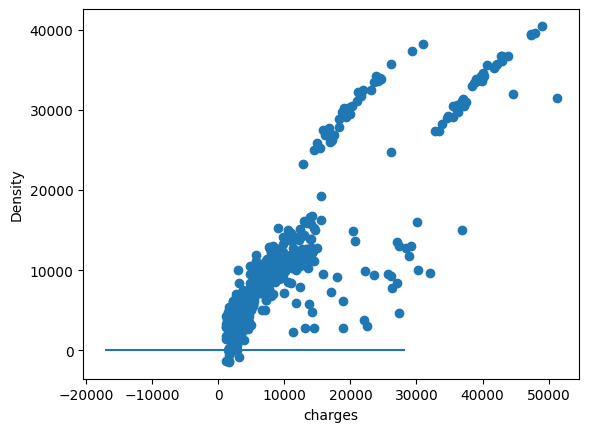

In [412]:
plt.scatter(Real_Values,predictions);
sns.distplot((y_test-predictions),bins=20);

In [413]:
predictions = lr.predict(X_test)
# predictions

In [414]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R^2:", metrics.r2_score(y_test, predictions))

MAE: 4026.2792753724552
MSE: 34971705.82341421
RMSE: 5913.688005248012
R^2: 0.7319111168219186
